In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [4]:
# Data Collection and Processing
# Loading the CSV data into a pandas dataframe
gold_data = pd.read_csv('gold_price_data.csv')

In [5]:
# Display first and last few rows of the dataframe
print("First 5 rows of the dataset:")
print(gold_data.head())
print("\nLast 5 rows of the dataset:")
print(gold_data.tail())


First 5 rows of the dataset:
         Date          SPX        GLD        USO     SLV   EUR/USD
0  01/02/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  01/03/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  01/04/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  01/07/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  01/08/2008  1390.189941  86.779999  76.059998  15.590  1.557099

Last 5 rows of the dataset:
            Date          SPX         GLD      USO      SLV   EUR/USD
2285  05/08/2018  2671.919922  124.589996  14.0600  15.5100  1.186789
2286  05/09/2018  2697.790039  124.330002  14.3700  15.5300  1.184722
2287  05/10/2018  2723.070068  125.180000  14.4100  15.7400  1.191753
2288   5/14/2018  2730.129883  124.489998  14.3800  15.5600  1.193118
2289   5/16/2018  2725.780029  122.543800  14.4058  15.4542  1.182033


In [6]:
# Checking the number of rows and columns
print("\nShape of the dataset:", gold_data.shape)


Shape of the dataset: (2290, 6)


In [7]:
# Getting information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# Checking for missing values
missing_values = gold_data.isnull().sum()
print("\nMissing values in each column:\n", missing_values)


Missing values in each column:
 Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64


In [9]:
# Statistical measures of the data
print("\nStatistical Summary:\n", gold_data.describe())


Statistical Summary:
                SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297
75%    2073.010070   132.840004    37.827501    22.882500     1.369971
max    2872.870117   184.589996   117.480003    47.259998     1.598798


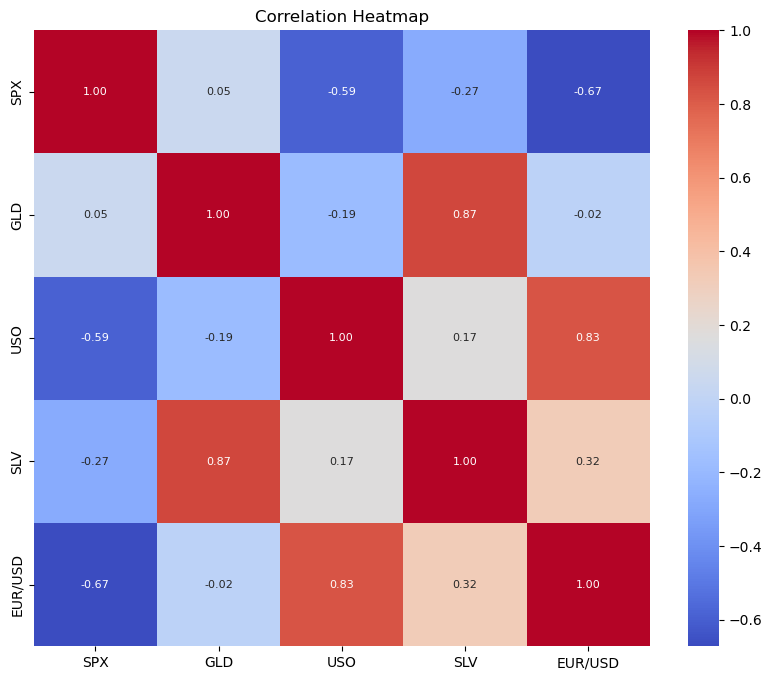

In [11]:
# Drop non-numeric columns (like 'Date') before calculating correlation
numeric_data = gold_data.select_dtypes(include=['float64', 'int64'])
correlation = numeric_data.corr()

# Constructing a heatmap to visualize correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8},
            cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


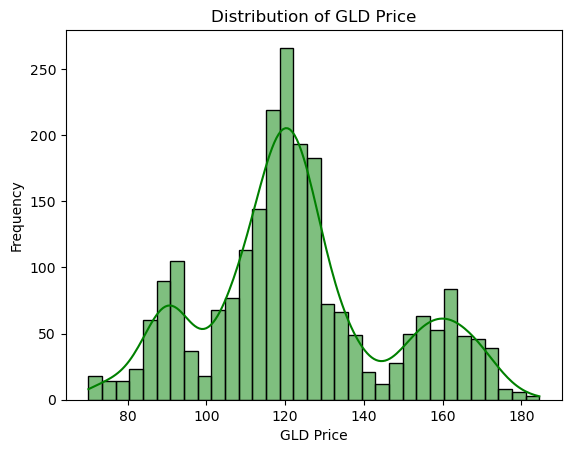

In [12]:
# Checking the distribution of the GLD price
sns.histplot(gold_data['GLD'], kde=True, color='green')
plt.title('Distribution of GLD Price')
plt.xlabel('GLD Price')
plt.ylabel('Frequency')
plt.show()


In [13]:
# Splitting the features and target
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [14]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Splitting into Training and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=2)

In [23]:
param_grid = {
 'n_estimators': [100, 200, 300],
 'max_depth': [10, 20, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=2),
param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [17]:
# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print("\nBest Parameters from GridSearchCV:\n", best_params)


Best Parameters from GridSearchCV:
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [24]:
# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print("\nBest Parameters from GridSearchCV:\n", best_params)


Best Parameters from GridSearchCV:
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [25]:
# Training the final model
regressor = RandomForestRegressor(**best_params, random_state=2)
regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=2)

In [26]:
# Prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [27]:
# R-squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('\nR-squared Error:', error_score)


R-squared Error: 0.9884891077553465


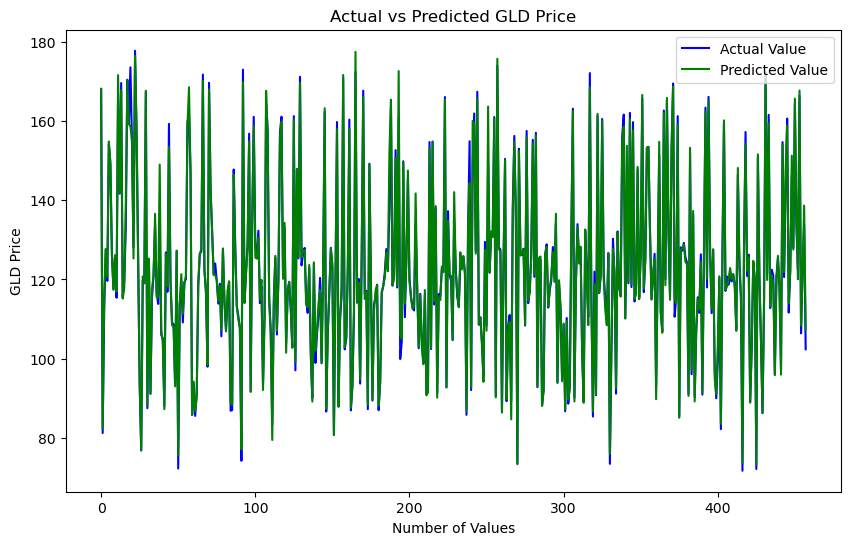

In [28]:
# Compare Actual Values and Predicted Values in a Plot
plt.figure(figsize=(10, 6))
plt.plot(Y_test.values, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual vs Predicted GLD Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

C:\Users\karth\AppData\Local\Temp\ipykernel_16784\3046470746.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


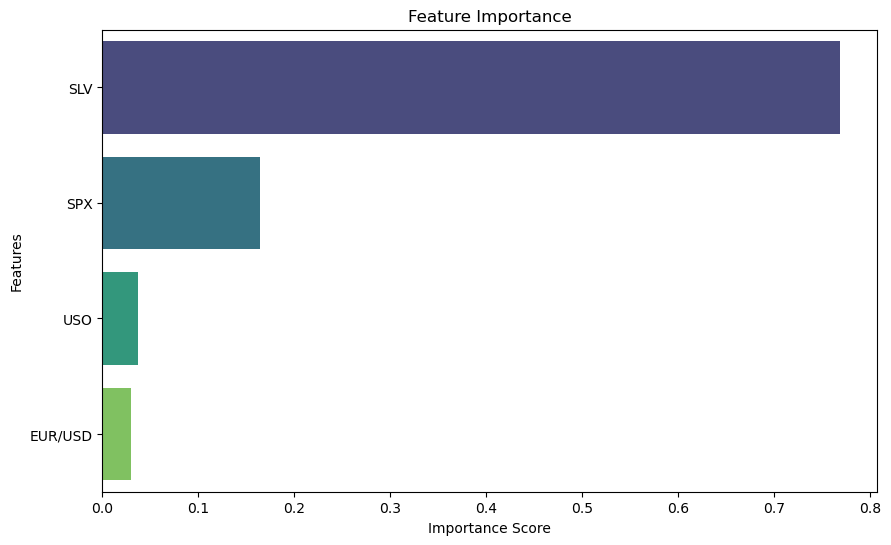


Feature Importance:
 SLV        0.768912
SPX        0.164451
USO        0.037086
EUR/USD    0.029551
dtype: float64


In [29]:
# Feature Importance
feature_importance = pd.Series(regressor.feature_importances_,
index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
print("\nFeature Importance:\n", feature_importance)
